#### Intro to Keras  
Keras is an API that acts as an interface for Tensorflow. It is a popular choice for building neural networks, especially as you are first learning, since it abstracts away most of the complexities involved in
deep learning. Another popular choice is Pytorch - while we will not formally cover Pytorch, you might want to challenge yourself to learn this library as well. More resources will be provided at the end of this
chapter.
Neural Network in Keras
To create a neural network in Keras, we can follow three easy steps:
1. Define our network structure
2. Compile our model
3. Fit our model
Let's try it on a classification problem!
Note: you can watch a video walkthrough of this code at the end of this module.

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Import data
The dataset is from Data.World and the goal is to use basketball player statistics to predict whether or not 
a NBA Rookie will last at least 5 years in the league. 
You can download the data here. The target column is defined as:
 y = 0 if career years played < 5
 y = 1 if career years played >= 5

In [3]:
# Get data
df = pd.read_csv(r"C:\Users\User\github_projects\Machine_Learning_with_Python\datasets\nba.csv", index_col = 'Name')
df.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [4]:
# Drop missings
df.dropna(inplace = True)
# Save X data
X = df.drop(columns = 'TARGET_5Yrs')
# Encode our target
y = df['TARGET_5Yrs']

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [6]:
# Scale our data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 1: Define our network structure  
The first thing we need to define is how many features we have in our X data. This will be used in our first hidden layer, in which we have to tell Keras how many features to be expecting from our input layer.

In [8]:
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

19

In [9]:
# Sequential model
model = Sequential()

We can now add our hidden layers! We will use two hidden layers in this example, but you can really use as few or as many as you want. However, be careful adding too many hidden layers, as this
increases complexity, furthers the nature of the black box, and can lead to overfitting.
There are many types of layers in Keras and these refer to the type of neural network we are fitting. The most common layer is a Dense layer, which means that the network is fully connected.
Within a dense layer, we need to specify the number of neurons we want in that layer and the type of activation function we want to use. The number of neurons in each layer is ultimately up to you - as a
general rule of thumb, use less than or equal to the number of features you have and decrease the number of neurons as you go through the network. Within hidden layers, it is common to use the ReLU
function, as it tends to perform well.

In [10]:
# First hidden layer
model.add(Dense(19, # How many neurons you have in your first hidden layer

input_dim = input_shape, # What is the shape of your input features (number of columns)
activation = 'relu')) # What activation function are you using?

# Second hidden layer
model.add(Dense(10, # How many neurons you have in your second hidden layer
activation = 'relu')) # What activation function are you using?

We then need to add our output layer. The output layer needs to have the number of nodes you want in your output layer (this is often 1, but can be more for multiclass classification) and the activation
function for the specific task. The activation function determines the range of values that the output layer can and should take on.
For regression problems, we want to use the linear activation function.
For classification problems, we want to use the sigmoid activation function.

### Step 2: Compile our model  
When compiling our model, we need to specify which loss function we are using and what optimizer we will use to fit. A common optimizer to choose is the Adam optimizer.
For regression problems, we would want to use a loss function like MSE.
For binary classification problems like this one, we want to use the binary cross-entropy loss. This can be abbreviated as "bce" in Keras.
For multiclass classification problems, we would use categorical cross-entropy.

In [11]:
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')

Step 3: Fit our model
We can finally fit our model to our training data! We often want to save the fitting process so we can visualize our loss over time.

Epoch 1/10

32/32 [==============================] - 1s 11ms/step - loss: 6.4028 - val_loss: 6.1129
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 5.7863 - val_loss: 5.5994
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 5.3126 - val_loss: 5.1247
Epoch 4/10
32/32 [==============================] - 0s 4ms/step - loss: 4.7252 - val_loss: 4.4751
Epoch 5/10
32/32 [==============================] - 0s 4ms/step - loss: 4.1138 - val_loss: 3.9703
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 3.6213 - val_loss: 3.6014
Epoch 7/10
32/32 [==============================] - 0s 6ms/step - loss: 3.3199 - val_loss: 3.4091
Epoch 8/10
32/32 [==============================] - 0s 4ms/step - loss: 3.0413 - val_loss: 3.1460
Epoch 9/10
32/32 [==============================] - 0s 4ms/step - loss: 2.8487 - val_loss: 2.8809
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 2.7104 - val_loss: 2.7107


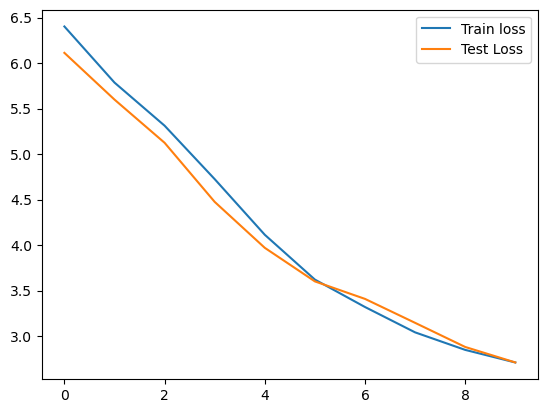

In [12]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,

validation_data = (X_test, y_test),
epochs=10)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

We can see that as we icrease the number of epochs we train our model for both our training and validation loss decreases!  
This is exactly what we want, as we want the loss to be as low as possible.  
In reality we would run our model for a lot more than 10 epochs